In [675]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    confusion_matrix, precision_recall_curve, roc_curve,
    RocCurveDisplay, ConfusionMatrixDisplay 
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# ML Algorithm
#%pip install xgboost lightgbm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [642]:
d = pd.read_csv("health_fitness_dataset.csv")
d.shape

(687701, 22)

### Data Preprocessing

In [644]:
d.head(10)

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,103,6.6,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,102,8.1,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,126,6.2,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,141,7.2,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,112,7.1,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33
5,1,2024-01-10,56,F,165.3,54.9,HIIT,31,Medium,6.8,121,7.5,10,10202,2.2,19.6,69.5,110.7,72.9,NaN,Never,0.37
6,1,2024-01-11,56,F,165.3,55.2,Weight Training,97,High,12.4,145,6.6,8,5912,2.8,19.6,69.5,110.7,72.9,NaN,Never,0.51
7,1,2024-01-12,56,F,165.3,55.5,HIIT,70,Low,12.9,99,6.1,7,9477,1.6,19.6,69.5,110.7,72.9,NaN,Never,0.58
8,1,2024-01-17,56,F,165.3,55.7,HIIT,89,Medium,19.7,112,7.2,7,9710,3.3,19.6,69.5,110.7,72.9,NaN,Never,0.68
9,1,2024-01-18,56,F,165.3,56.0,Weight Training,115,Medium,12.8,117,5.6,3,7830,2.0,19.6,69.5,110.7,72.9,NaN,Never,0.82


In [645]:
d.tail(10)

,participant_id,date,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level
687691,3000,2024-12-11,38,F,165.7,111.6,Yoga,75,Medium,8.3,146,7.6,2,8063,3.2,20.7,66.5,127.0,75.5,NaN,Never,16.87
687692,3000,2024-12-13,38,F,165.7,111.8,Yoga,61,Low,5.7,121,6.4,7,5778,2.2,20.7,66.5,127.0,75.5,NaN,Never,16.93
687693,3000,2024-12-14,38,F,165.7,112.1,Basketball,56,Low,13.9,114,7.2,9,8701,2.8,20.7,66.5,127.0,75.5,NaN,Never,16.98
687694,3000,2024-12-17,38,F,165.7,112.3,Basketball,33,Medium,9.9,132,7.9,6,5875,3.4,20.7,66.5,127.0,75.5,NaN,Never,17.02
687695,3000,2024-12-18,38,F,165.7,112.6,Yoga,48,Medium,5.4,131,6.9,1,7286,3.4,20.7,66.5,127.0,75.5,NaN,Never,17.08
687696,3000,2024-12-19,38,F,165.7,112.9,Basketball,44,Medium,13.2,139,7.4,6,6911,1.9,20.7,66.5,127.0,75.5,NaN,Never,17.13
687697,3000,2024-12-20,38,F,165.7,113.1,Basketball,25,Low,6.3,113,8.5,6,8932,2.6,20.7,66.5,127.0,75.5,NaN,Never,17.16
687698,3000,2024-12-21,38,F,165.7,113.4,Yoga,97,Low,9.1,120,8.2,8,8864,1.8,20.7,66.5,127.0,75.5,NaN,Never,17.26
687699,3000,2024-12-22,38,F,165.7,113.6,Basketball,108,Medium,32.6,135,8.5,4,7455,2.1,20.7,66.5,127.0,75.5,NaN,Never,17.39
687700,3000,2024-12-23,38,F,165.7,113.9,Yoga,29,High,3.8,164,7.4,2,9737,2.0,20.7,66.5,127.0,75.5,NaN,Never,17.43


In [646]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   participant_id            687701 non-null  int64  
 1   date                      687701 non-null  object 
 2   age                       687701 non-null  int64  
 3   gender                    687701 non-null  object 
 4   height_cm                 687701 non-null  float64
 5   weight_kg                 687701 non-null  float64
 6   activity_type             687701 non-null  object 
 7   duration_minutes          687701 non-null  int64  
 8   intensity                 687701 non-null  object 
 9   calories_burned           687701 non-null  float64
 10  avg_heart_rate            687701 non-null  int64  
 11  hours_sleep               687701 non-null  float64
 12  stress_level              687701 non-null  int64  
 13  daily_steps               687701 non-null  i

In [647]:
d.describe()

,participant_id,age,height_cm,weight_kg,duration_minutes,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,fitness_level
count,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000,687701.000000
mean,1499.781828,41.658602,168.587699,94.921981,70.011671,15.381302,131.454165,7.048799,5.252389,8628.370918,2.499427,22.733134,70.010547,120.001260,80.188079,9.524900
std,865.997215,13.581770,9.140811,22.461801,29.147251,9.985552,17.814744,0.972068,2.770029,2054.756608,0.579050,3.568383,5.074563,10.008917,8.239418,5.502485
min,1.000000,18.000000,145.000000,45.300000,20.000000,0.800000,82.000000,4.000000,1.000000,-419.000000,1.500000,14.200000,51.100000,78.000000,53.700000,0.020000
25%,749.000000,30.000000,161.700000,78.200000,45.000000,7.800000,118.000000,6.400000,3.000000,7203.000000,2.000000,20.100000,66.500000,113.100000,74.600000,4.770000
50%,1499.000000,42.000000,168.200000,94.600000,70.000000,13.000000,130.000000,7.000000,5.000000,8607.000000,2.500000,22.400000,70.000000,120.200000,80.100000,9.510000
75%,2249.000000,53.000000,175.300000,110.500000,95.000000,20.700000,144.000000,7.700000,8.000000,10027.000000,3.000000,25.100000,73.500000,127.000000,85.700000,14.230000
max,3000.000000,64.000000,198.500000,188.400000,120.000000,92.000000,206.000000,10.000000,10.000000,17241.000000,3.500000,38.800000,87.100000,152.700000,112.100000,21.930000


In [648]:
d.isnull().sum()

participant_id                   0
date                             0
age                              0
gender                           0
height_cm                        0
weight_kg                        0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
avg_heart_rate                   0
hours_sleep                      0
stress_level                     0
daily_steps                      0
hydration_level                  0
bmi                              0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
health_condition            490275
smoking_status                   0
fitness_level                    0
dtype: int64

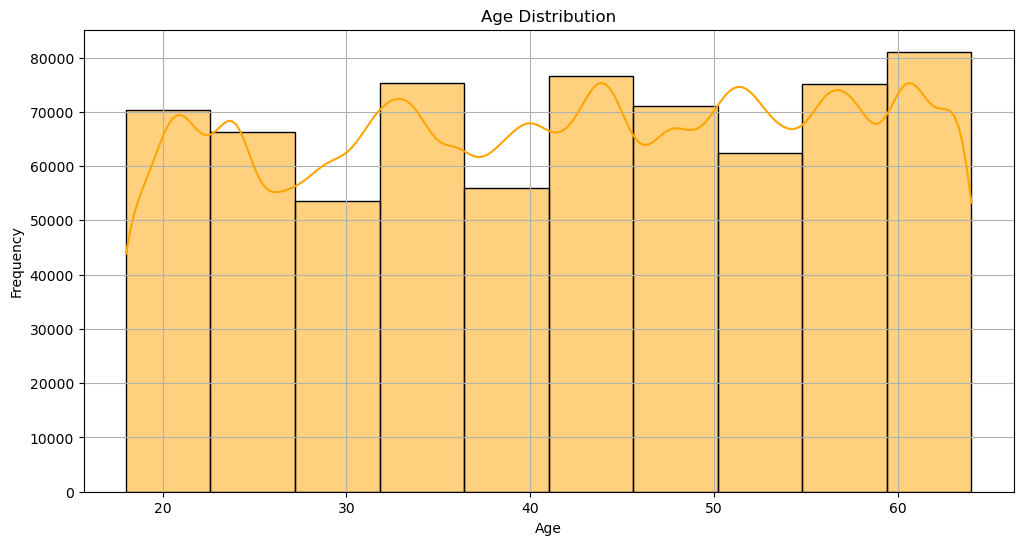

In [649]:
# Plot age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=d, x='age', bins=10, kde=True, color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

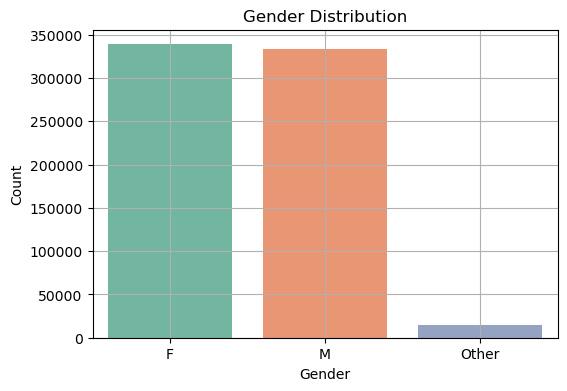

In [650]:
# Plot gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(d, x='gender',hue='gender',legend=False, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

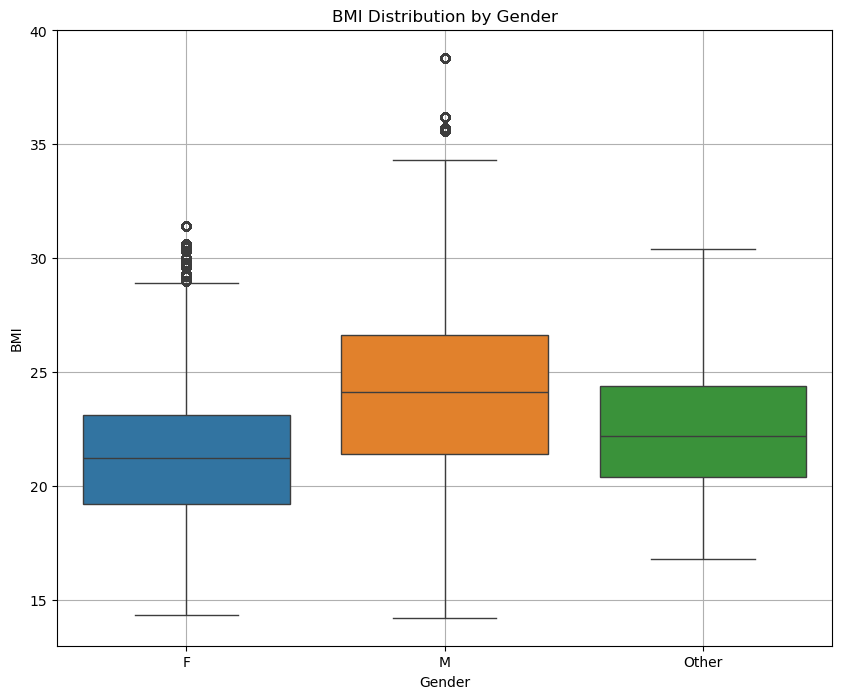

In [651]:
# BMI Distribution by Gender
plt.figure(figsize=(10, 8))
#plt.subplot(1, 1, 1)
sns.boxplot(data=d, x='gender', y='bmi',hue='gender')
plt.title('BMI Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid(True)
plt.show()


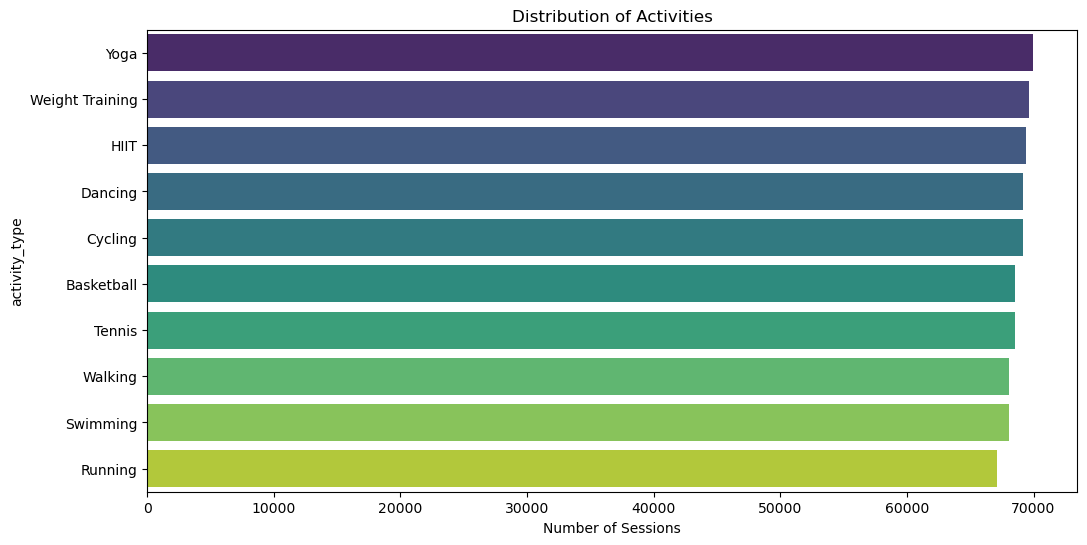

In [652]:
# Activity Distribution
plt.figure(figsize=(12, 6))
activity_counts = d['activity_type'].value_counts()
sns.barplot(x=activity_counts.values, y=activity_counts.index,hue=activity_counts.index,dodge=False,legend=False, palette='viridis')
plt.title('Distribution of Activities')
plt.xlabel('Number of Sessions')
plt.show()

### Encodeing dataset and cleaning for model prediction

In [654]:
df = d.copy()

In [655]:
# Encoding, 0= No health condition, 1 = Has a health condition
df['health_condition'] = df['health_condition'].apply(lambda x: 0 if pd.isna(x) else 1)
print(d['health_condition'].value_counts())

health_condition
Hypertension    99437
Diabetes        64754
Asthma          33235
Name: count, dtype: int64


In [656]:
# droping missing value before mapping
df = df.dropna(subset= ['gender'])

In [657]:
# Map binary/ordinal variables
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['intensity'] = df['intensity'].map({'Low': 0, 'Medium': 1, 'High': 2})
#df['fitness_level_category'] = df['fitness_level_category'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['smoking_status'] = df['smoking_status'].map({
    'Never': 0,
    'Former': 1,
    'Current': 1
})

In [658]:
# defining bins
bins = [0,6,12,float('inf')]
labels= ['Low','Medium','High']

df['fitness_level_category']= pd.cut(df['fitness_level'], bins=bins, labels= labels)
df['fitness_level_category'] = df['fitness_level_category'].map({'Low': 0, 'Medium': 1, 'High': 2})
df.drop('fitness_level', axis=1, inplace= True)
# check distribution count
print(df['fitness_level_category'].value_counts())

fitness_level_category
2    252958
1    218080
0    216663
Name: count, dtype: int64


In [659]:


# One-hot encode activity_type
df = pd.get_dummies(df, columns=['activity_type'], drop_first=True)

# droping unused column
df = df.drop(['participant_id','date'], axis=1)

# Convert health_condition to int
#df['health_condition'] = df['health_condition'].astype(int)

# Check for any remaining nulls
#print(df.isnull().sum().sum())  # should be 0

# final cleanup
df= df.dropna()

In [696]:
pd.set_option('display.max_columns', None)
df.head(10)

,age,gender,height_cm,weight_kg,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level_category,activity_type_Cycling,activity_type_Dancing,activity_type_HIIT,activity_type_Running,activity_type_Swimming,activity_type_Tennis,activity_type_Walking,activity_type_Weight Training,activity_type_Yoga,stress_category
0,45,1.0,169.3,86.5,20,1,6.9,129,6.3,1,7988,1.6,24.0,76.4,124.2,69.4,0,1,0,False,False,True,False,False,False,False,False,False,0
1,29,0.0,151.9,70.3,69,1,8.9,158,7.7,4,10838,2.4,19.5,70.8,117.4,82.2,0,1,1,False,True,False,False,False,False,False,False,False,0
2,50,0.0,164.8,93.2,99,1,9.2,124,7.0,3,9922,3.3,23.2,66.5,100.0,84.4,0,0,1,False,False,False,False,False,False,False,False,True,0
3,59,0.0,160.2,69.6,64,1,8.1,121,7.3,1,8932,2.5,19.9,51.1,108.6,77.6,0,1,1,False,True,False,False,False,False,False,False,False,0
4,56,0.0,149.3,79.1,98,1,18.8,124,7.8,2,10257,1.9,20.2,71.1,121.1,77.4,0,1,1,False,False,False,False,False,True,False,False,False,0
5,63,0.0,172.9,82.1,110,0,30.0,105,7.2,9,9879,2.0,22.3,72.9,126.1,73.5,0,0,0,False,False,True,False,False,False,False,False,False,2
6,47,0.0,154.3,50.8,60,2,4.5,149,6.7,5,10532,1.8,19.3,78.1,122.0,84.9,0,0,0,False,False,False,False,False,False,True,False,False,1
7,54,1.0,186.2,99.9,63,1,6.3,122,7.6,7,9037,2.3,28.7,72.2,129.3,89.2,1,1,0,False,False,False,False,False,False,False,False,True,1
8,53,0.0,167.5,78.8,118,2,43.2,148,7.0,8,11556,2.9,22.6,76.6,129.2,80.9,0,0,0,False,False,True,False,False,False,False,False,False,2
9,41,0.0,168.7,107.0,113,1,34.2,119,6.7,3,7131,2.5,20.3,70.4,107.6,86.9,0,1,2,True,False,False,False,False,False,False,False,False,0


### Preparing Data for model

In [662]:
# shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop = True)

### Model training

In [692]:
df = df.dropna(subset =['stress_level'])

# creating stress categorey
df['stress_category']= pd.cut(df['stress_level'],bins=[0,4,7,10], labels=['Low', 'Medium', 'High'])

#encoding category as numbers
df['stress_category']= df['stress_category'].map({'Low':0, 'Medium':1, 'High':2})

print(df['stress_category'].value_counts())

stress_category
0    285531
1    214852
2    172496
Name: count, dtype: int64


In [694]:
df.head()

,age,gender,height_cm,weight_kg,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,health_condition,smoking_status,fitness_level_category,activity_type_Cycling,activity_type_Dancing,activity_type_HIIT,activity_type_Running,activity_type_Swimming,activity_type_Tennis,activity_type_Walking,activity_type_Weight Training,activity_type_Yoga,stress_category
0,45,1.0,169.3,86.5,20,1,6.9,129,6.3,1,7988,1.6,24.0,76.4,124.2,69.4,0,1,0,False,False,True,False,False,False,False,False,False,0
1,29,0.0,151.9,70.3,69,1,8.9,158,7.7,4,10838,2.4,19.5,70.8,117.4,82.2,0,1,1,False,True,False,False,False,False,False,False,False,0
2,50,0.0,164.8,93.2,99,1,9.2,124,7.0,3,9922,3.3,23.2,66.5,100.0,84.4,0,0,1,False,False,False,False,False,False,False,False,True,0
3,59,0.0,160.2,69.6,64,1,8.1,121,7.3,1,8932,2.5,19.9,51.1,108.6,77.6,0,1,1,False,True,False,False,False,False,False,False,False,0
4,56,0.0,149.3,79.1,98,1,18.8,124,7.8,2,10257,1.9,20.2,71.1,121.1,77.4,0,1,1,False,False,False,False,False,True,False,False,False,0


In [700]:
print(df.columns.tolist())

['age', 'gender', 'height_cm', 'weight_kg', 'duration_minutes', 'intensity', 'calories_burned', 'avg_heart_rate', 'hours_sleep', 'stress_level', 'daily_steps', 'hydration_level', 'bmi', 'resting_heart_rate', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'health_condition', 'smoking_status', 'fitness_level_category', 'activity_type_Cycling', 'activity_type_Dancing', 'activity_type_HIIT', 'activity_type_Running', 'activity_type_Swimming', 'activity_type_Tennis', 'activity_type_Walking', 'activity_type_Weight Training', 'activity_type_Yoga', 'stress_category']


### Defining models

In [711]:
!pip install imbalanced-learn

In [743]:
# Select only numeric columns from your DataFrame
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Get correlation of all features with 'stress_level'
correlation_with_stress = correlation_matrix['stress_level'].sort_values(ascending=False)

# Display result
print("🔍 Feature correlations with 'stress_level':")
print(correlation_with_stress)

🔍 Feature correlations with 'stress_level':
stress_level                1.000000
hours_sleep                 0.001311
health_condition            0.001189
hydration_level             0.001014
daily_steps                 0.000890
age                         0.000840
duration_minutes            0.000744
avg_heart_rate              0.000061
blood_pressure_systolic     0.000040
intensity                  -0.000618
blood_pressure_diastolic   -0.000719
smoking_status             -0.000768
resting_heart_rate         -0.001229
calories_burned            -0.001642
weight_kg                  -0.002511
gender                     -0.002889
bmi                        -0.003316
height_cm                  -0.004560
Name: stress_level, dtype: float64


In [749]:
# Ensure it's a number
df['stress_category'] = df['stress_category'].astype(int)

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Safely check correlation
if 'stress_category' in numeric_df.columns:
    correlation_with_category = numeric_df.corr()['stress_category'].sort_values(ascending=False)
    print("🔍 Feature Correlation with 'stress_category':")
    print(correlation_with_category)
else:
    print("❌ 'stress_category' is not numeric or missing from numeric_df")

🔍 Feature Correlation with 'stress_category':
stress_category             1.000000
stress_level                0.936602
health_condition            0.001407
daily_steps                 0.000879
hydration_level             0.000877
hours_sleep                 0.000771
avg_heart_rate              0.000766
duration_minutes            0.000673
age                         0.000214
blood_pressure_systolic    -0.000409
intensity                  -0.000447
blood_pressure_diastolic   -0.000529
smoking_status             -0.000886
resting_heart_rate         -0.000982
calories_burned            -0.001208
weight_kg                  -0.002235
gender                     -0.002673
bmi                        -0.002929
height_cm                  -0.004381
Name: stress_category, dtype: float64


In [753]:
# Ensure it's a number
df['fitness_level_category'] = df['fitness_level_category'].astype(int)

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Safely check correlation
if 'fitness_level_category' in numeric_df.columns:
    correlation_with_fitness = numeric_df.corr()['fitness_level_category'].sort_values(ascending=False)
    print("🔍 Feature Correlation with 'fitness_level_category':")
    print(correlation_with_fitness)
else:
    print("❌ 'fitness_level_category' is not numeric or missing from numeric_df")

🔍 Feature Correlation with 'fitness_level_category':
fitness_level_category      1.000000
weight_kg                   0.715467
calories_burned             0.264398
intensity                   0.003313
resting_heart_rate          0.003029
duration_minutes            0.002982
age                         0.002046
stress_level                0.001701
stress_category             0.001576
height_cm                   0.001508
gender                      0.001394
avg_heart_rate              0.000828
blood_pressure_systolic     0.000587
blood_pressure_diastolic    0.000561
bmi                         0.000422
smoking_status              0.000084
health_condition           -0.000747
hydration_level            -0.000905
hours_sleep                -0.001474
daily_steps                -0.473976
Name: fitness_level_category, dtype: float64



📊 Logistic Regression Results:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

         Low       0.48      0.96      0.64     42413
      Medium       0.58      0.03      0.05     42689
        High       0.80      0.78      0.79     49474

    accuracy                           0.60    134576
   macro avg       0.62      0.59      0.50    134576
weighted avg       0.63      0.60      0.51    134576



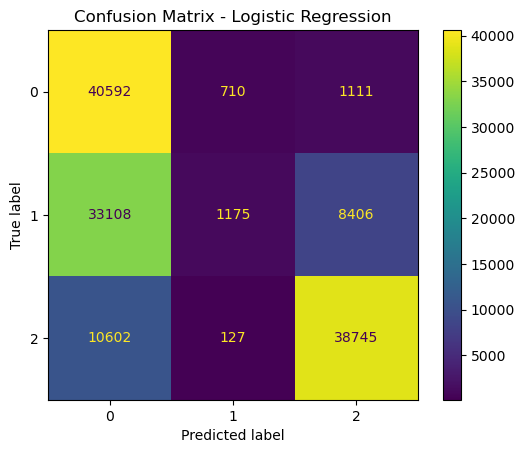

🎯 Multiclass ROC AUC Score: 0.8164


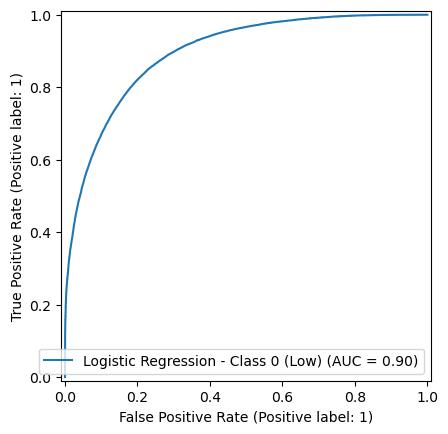

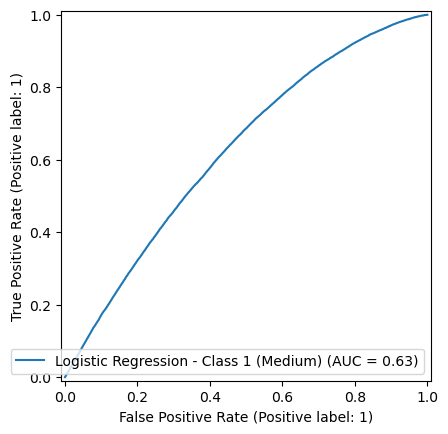

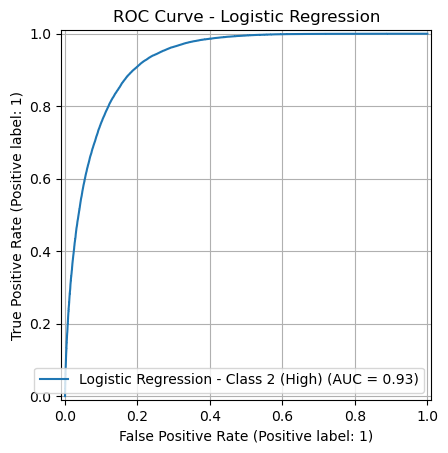


📊 Random Forest Results:
              precision    recall  f1-score   support

         Low       0.59      0.73      0.65     42413
      Medium       0.51      0.38      0.43     42689
        High       0.78      0.80      0.79     49474

    accuracy                           0.64    134576
   macro avg       0.63      0.64      0.63    134576
weighted avg       0.63      0.64      0.63    134576



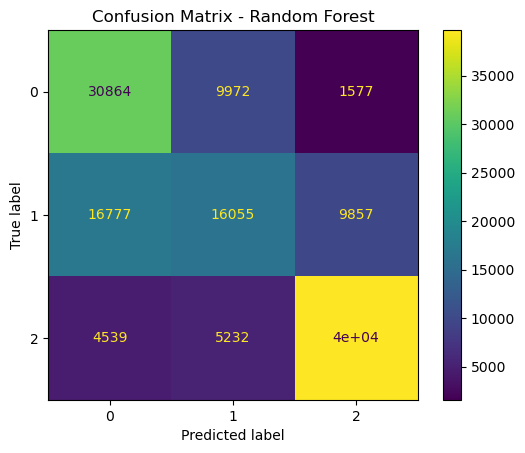

🎯 Multiclass ROC AUC Score: 0.8446


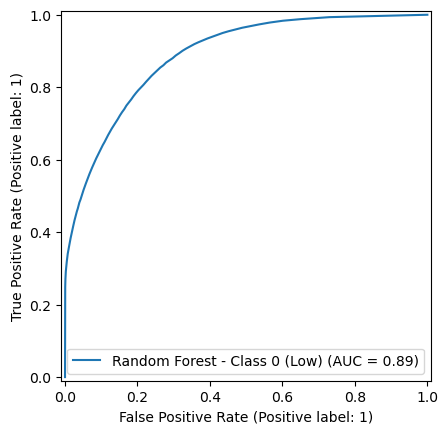

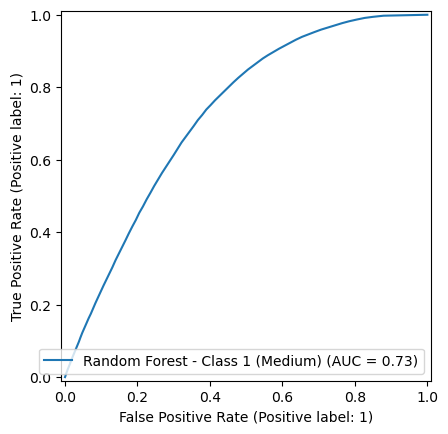

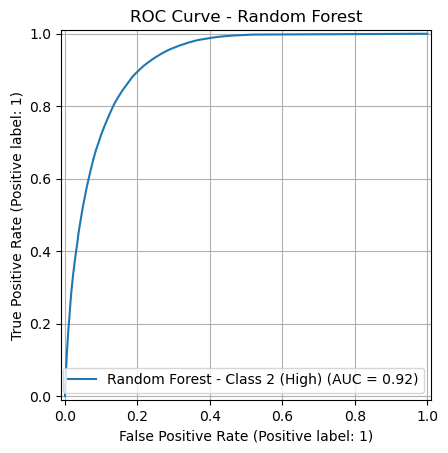


📊 XGBoost Results:


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         Low       0.63      0.69      0.66     42413
      Medium       0.55      0.46      0.50     42689
        High       0.78      0.83      0.81     49474

    accuracy                           0.67    134576
   macro avg       0.66      0.66      0.66    134576
weighted avg       0.66      0.67      0.66    134576



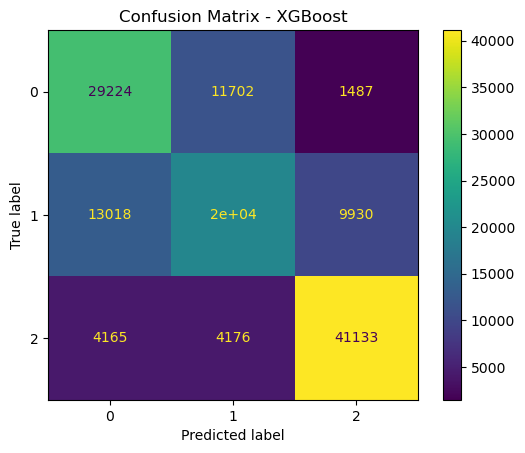

🎯 Multiclass ROC AUC Score: 0.8630


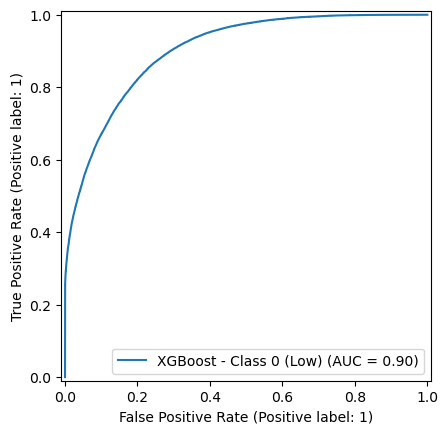

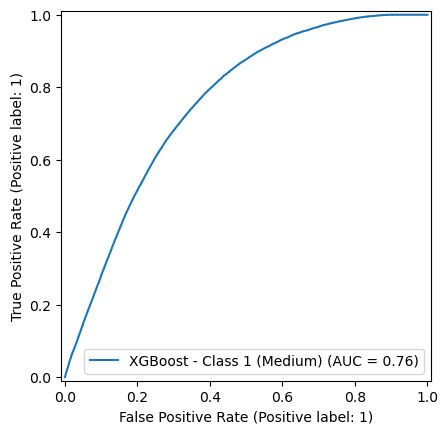

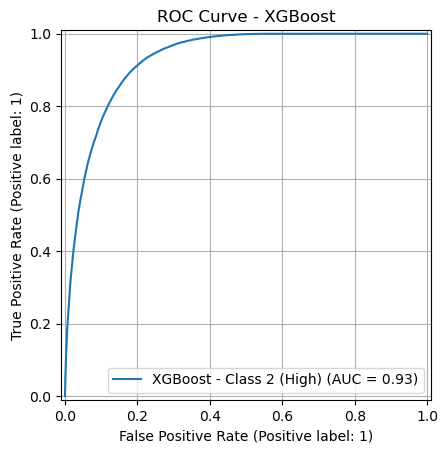

In [755]:
# Step 1: Define features and target
features = ['weight_kg', 'calories_burned', 'daily_steps']
target = 'fitness_level_category'

X = df[features]
y = df[target]
classes = [0, 1, 2]  # Low, Medium, High

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Binarize target for ROC AUC
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Step 5: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Step 6: Train, evaluate, and visualize

from sklearn.multiclass import OneVsRestClassifier
for name, base_model in models.items():
    print(f"\n📊 {name} Results:")
    
    model = OneVsRestClassifier(base_model)
    model.fit(X_train_scaled, y_train_bin)

    y_pred = model.predict(X_test_scaled)
    y_pred_class = np.argmax(y_pred, axis=1)

    # 📋 Evaluation
    print(classification_report(y_test, y_pred_class, target_names=["Low", "Medium", "High"]))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class)
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()

    # 🧠 ROC-AUC
    y_score = model.predict_proba(X_test_scaled)
    auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
    print(f"🎯 Multiclass ROC AUC Score: {auc:.4f}")

    for i in range(len(classes)):
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i], y_score[:, i],
            name=f"{name} - Class {i} ({['Low', 'Medium', 'High'][i]})"
        )
    plt.title(f"ROC Curve - {name}")
    plt.grid(True)
    plt.show()

In [757]:
# Create a comparison DataFrame manually
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.60, 0.64, 0.67],
    'Macro F1 Score': [0.50, 0.63, 0.66],
    'ROC AUC Score': [0.8164, 0.8446, 0.8630],
    'Class 0 AUC': [0.90, 0.89, 0.90],
    'Class 1 AUC': [0.63, 0.73, 0.76],
    'Class 2 AUC': [0.93, 0.92, 0.93]
})

# Show the table
print("\n📈 Model Performance Comparison:")
display(comparison_df.round(4))


📈 Model Performance Comparison:


,Model,Accuracy,Macro F1 Score,ROC AUC Score,Class 0 AUC,Class 1 AUC,Class 2 AUC
0,Logistic Regression,0.60,0.50,0.8164,0.90,0.63,0.93
1,Random Forest,0.64,0.63,0.8446,0.89,0.73,0.92
2,XGBoost,0.67,0.66,0.8630,0.90,0.76,0.93


📊 Decision Tree Classifier Results:
              precision    recall  f1-score   support

           0       0.51      0.75      0.61     42745
           1       0.42      0.34      0.37     42445
           2       0.77      0.59      0.67     49386

    accuracy                           0.56    134576
   macro avg       0.57      0.56      0.55    134576
weighted avg       0.58      0.56      0.56    134576



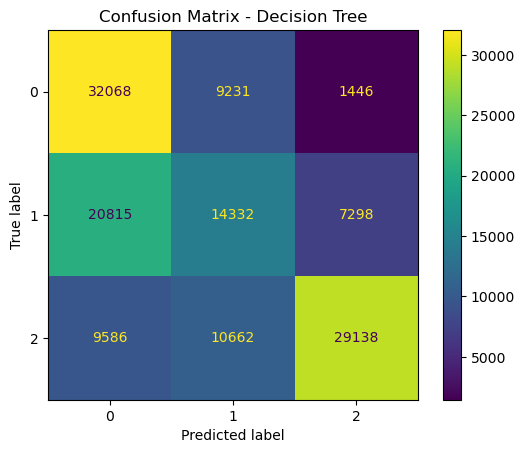

Multiclass ROC AUC Score: 0.6991


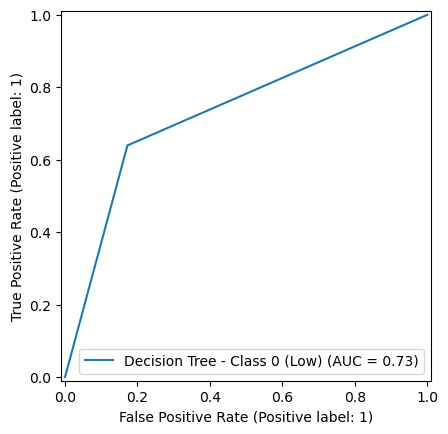

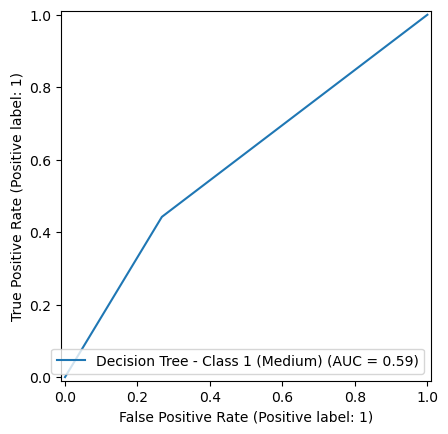

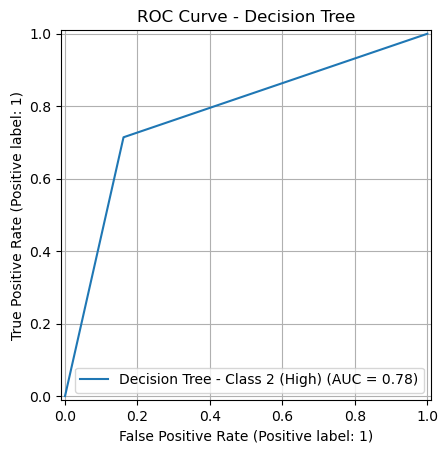

In [761]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score
#from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
#import matplotlib.pyplot as plt
#import numpy as np

# Define the model
dt_model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

# Fit the model
dt_model.fit(X_train_scaled, label_binarize(y_train, classes=[0,1,2]))

# Predict
y_pred = dt_model.predict(X_test_scaled)
y_pred_class = np.argmax(y_pred, axis=1)

# Evaluation
print("📊 Decision Tree Classifier Results:")
print(classification_report(y_test, y_pred_class))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class)
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.show()

# ROC AUC
y_score = dt_model.predict_proba(X_test_scaled)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print(f"Multiclass ROC AUC Score: {auc:.4f}")

# Plot ROC Curves
for i in range(3):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i], y_score[:, i],
        name=f"Decision Tree - Class {i} ({['Low', 'Medium', 'High'][i]})"
    )
plt.title("ROC Curve - Decision Tree")
plt.grid(True)
plt.show()

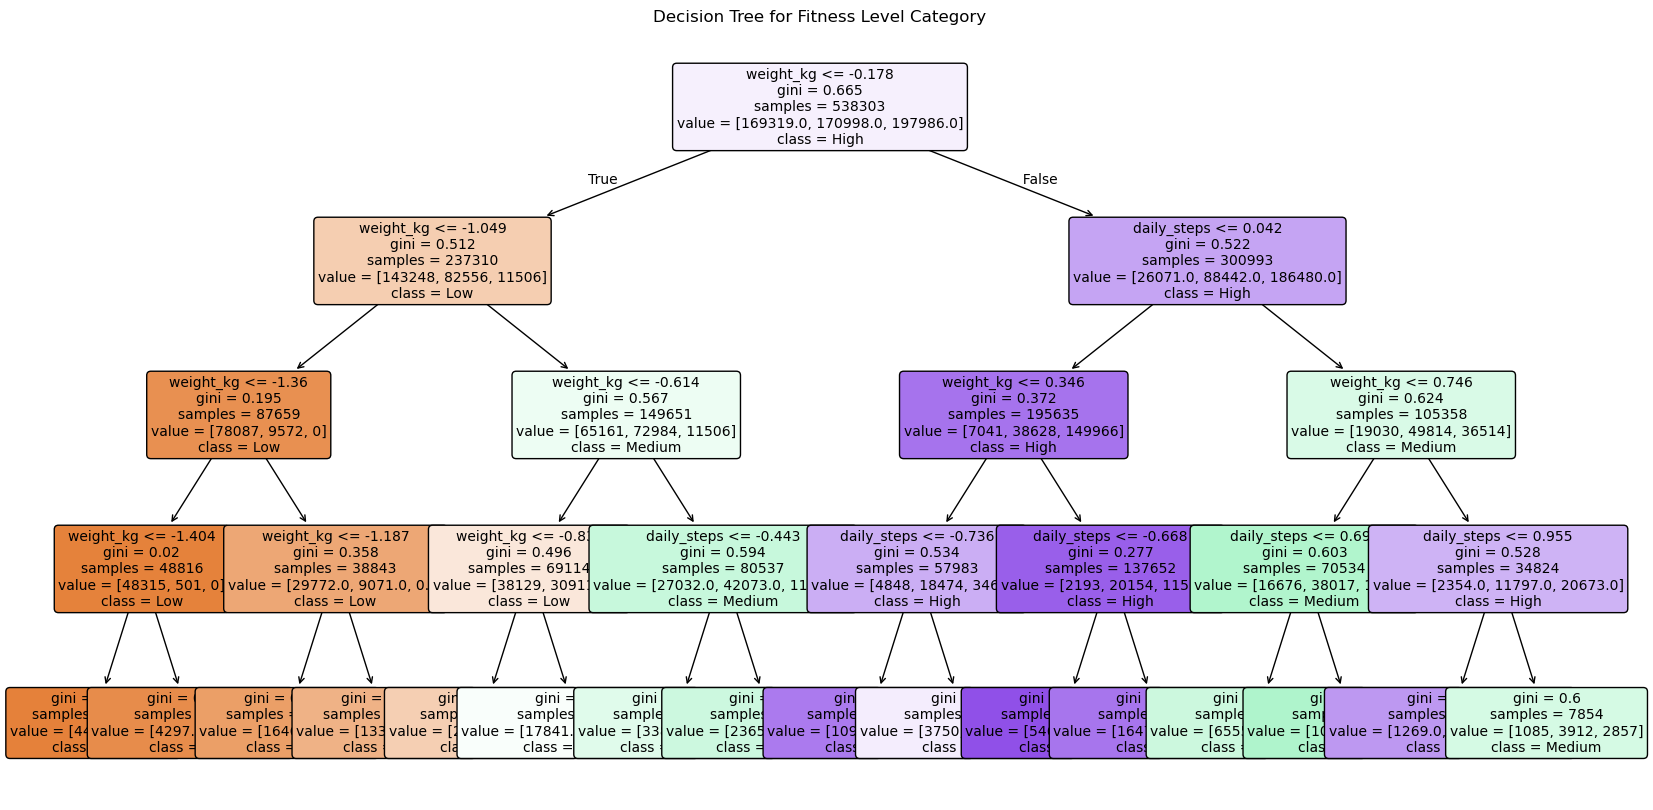

In [763]:
from sklearn.tree import DecisionTreeClassifier

# Fit the plain decision tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # max_depth can be adjusted
tree_model.fit(X_train_scaled, y_train)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree
plt.figure(figsize=(20, 10))  # increase figure size for better readability

plot_tree(tree_model, 
          filled=True, 
          rounded=True, 
          class_names=["Low", "Medium", "High"], 
          feature_names=X.columns,
          fontsize=10)

plt.title("Decision Tree for Fitness Level Category")
plt.show()

In [768]:
activity_features = [
    'duration_minutes',
    'intensity',
    'calories_burned',
    'daily_steps',
    'avg_heart_rate',
    'hydration_level',
    'fitness_level_category'
]
activity_type_cols = [col for col in df.columns if col.startswith('activity_type_')]
features_for_clustering = activity_features + activity_type_cols


# Scale features
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df[features_for_clustering])

### Elbow method to find Optimal K

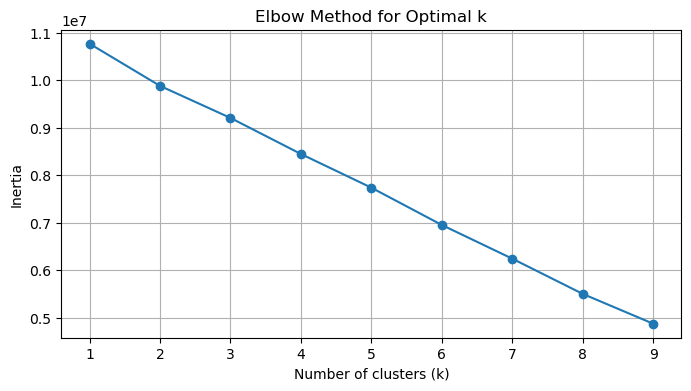

In [770]:
from sklearn.cluster import KMeans


inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

### Applying KMeans with chosen k

In [772]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['activity_cluster'] = kmeans.fit_predict(X_cluster)

### Visualizing clusters(2D using PCA)

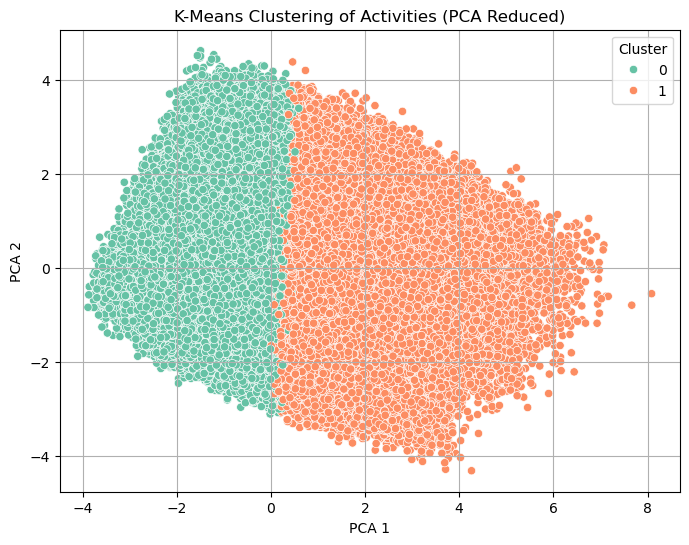

In [774]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_cluster)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1],
                hue=df['activity_cluster'], palette='Set2')
plt.title("K-Means Clustering of Activities (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

### Analyzing Cluster

In [778]:
cluster_summary = df.groupby('activity_cluster')[features_for_clustering].mean().T
print(cluster_summary)

activity_cluster                         0            1
duration_minutes                 57.867914    88.498987
intensity                         0.736628     1.146226
calories_burned                   9.239231    24.754779
daily_steps                    8948.468624  8142.274889
avg_heart_rate                  127.708249   137.218203
hydration_level                   2.500038     2.498933
fitness_level_category            0.875757     1.321729
activity_type_Cycling             0.071924     0.144396
activity_type_Dancing             0.126766     0.060841
activity_type_HIIT                0.039894     0.194286
activity_type_Running             0.055092     0.162189
activity_type_Swimming            0.098255     0.100642
activity_type_Tennis              0.091352     0.111987
activity_type_Walking             0.148258     0.024221
activity_type_Weight Training     0.117880     0.075618
activity_type_Yoga                0.158599     0.014125


### Distribution of fitness level categories

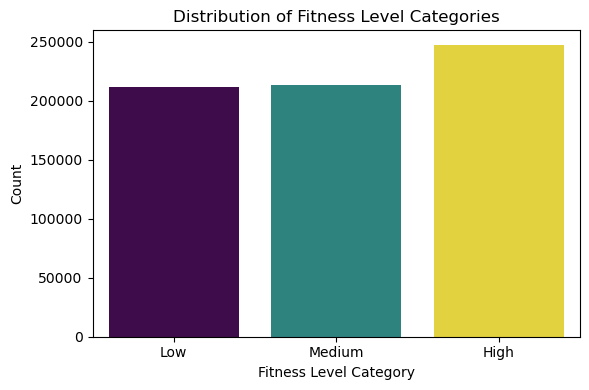

In [792]:


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fitness_level_category',hue= 'fitness_level_category',legend=False, palette='viridis')
plt.title('Distribution of Fitness Level Categories')
plt.xlabel('Fitness Level Category')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2], labels=['Low', 'Medium', 'High'])

plt.savefig("figure_fitness_distribution.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

### Correlation heatmap with fitness level category

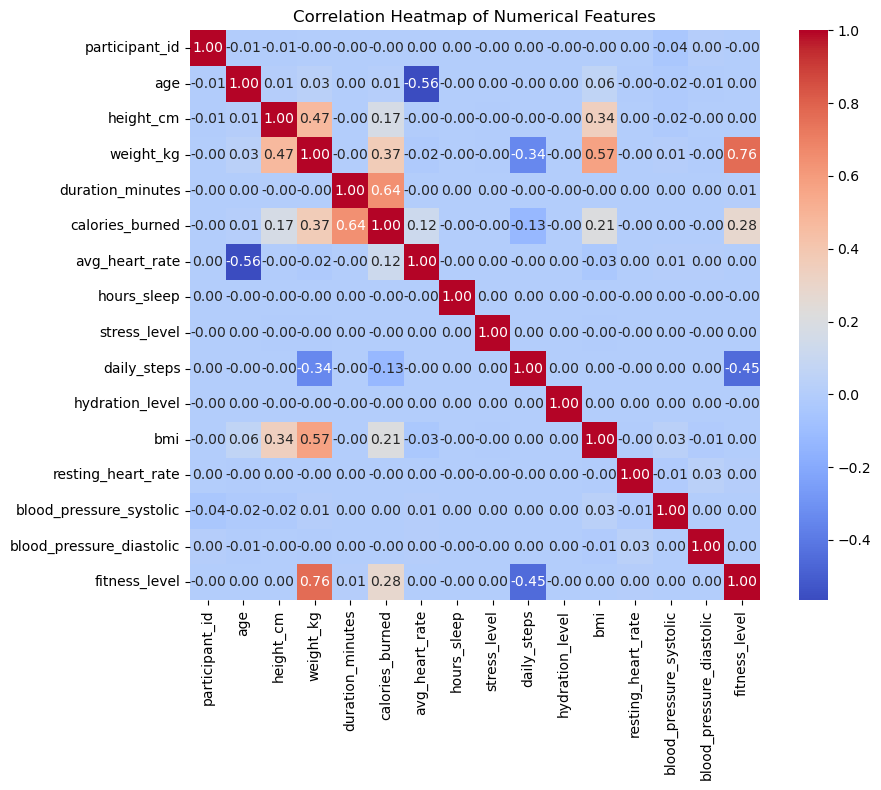

In [794]:
# Only include numeric features + target
numeric_df = d.select_dtypes(include=['int64', 'float64']).copy()

# If not already added, include the target column as numeric
# Example: d['fitness_level_category'] = d['fitness_level'].map(mapping)

# Plot correlation
plt.figure(figsize=(10,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')

# ✅ Save figure
plt.savefig("figure_correlation_heatmap.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

### Boxplot: Daily steps vs fitness level category

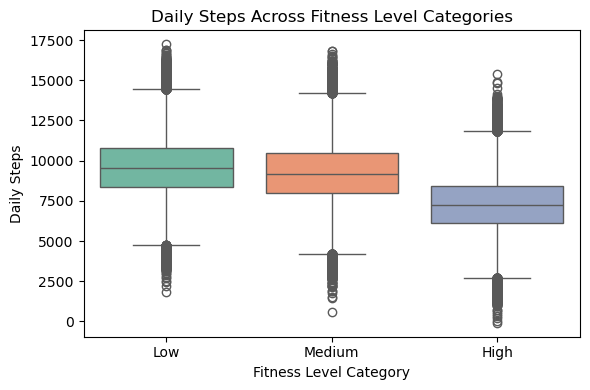

In [800]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='fitness_level_category', y='daily_steps',hue='fitness_level_category', legend= False, palette='Set2')
plt.title('Daily Steps Across Fitness Level Categories')
plt.xlabel('Fitness Level Category')
plt.ylabel('Daily Steps')
plt.xticks(ticks=[0,1,2], labels=['Low', 'Medium', 'High'])

# ✅ Save figure
plt.savefig("figure_boxplot_daily steps vs fitness.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

### Activity type distribution

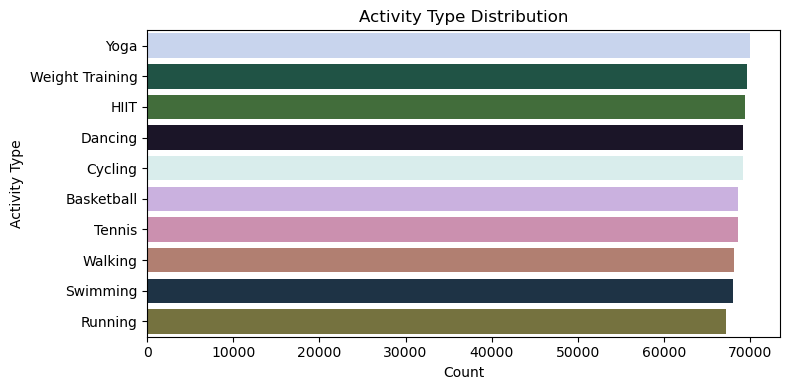

In [806]:
plt.figure(figsize=(8,4))
sns.countplot(data=d, y='activity_type', order=d['activity_type'].value_counts().index,hue='activity_type', legend= False, palette='cubehelix')
plt.title('Activity Type Distribution')
plt.xlabel('Count')
plt.ylabel('Activity Type')

# ✅ Save figure
plt.savefig("figure_activity_type_distribution.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

### Average duration per activity

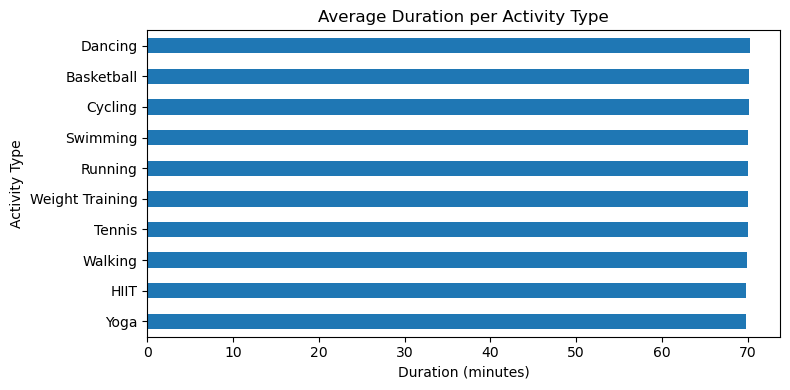

In [814]:
plt.figure(figsize=(8,4))
avg_duration = d.groupby('activity_type')['duration_minutes'].mean().sort_values()
avg_duration.plot(kind='barh')
plt.title('Average Duration per Activity Type')
plt.xlabel('Duration (minutes)')
plt.ylabel('Activity Type')

# ✅ Save figure
plt.savefig("figure_avg_duration_per_activity.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

### Boxplot: Fitness level category vs calories burned

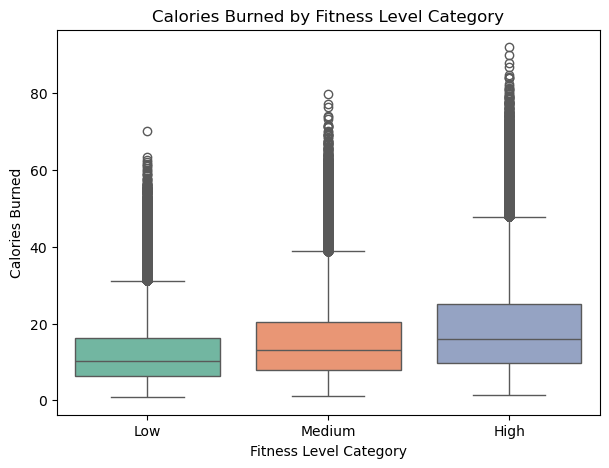

In [812]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='fitness_level_category', y='calories_burned', hue='fitness_level_category', legend= False, palette='Set2')
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])
plt.title('Calories Burned by Fitness Level Category')
plt.xlabel('Fitness Level Category')
plt.ylabel('Calories Burned')

plt.savefig('figure_boxplot_calories_by_fitness.png', dpi=300, bbox_inches='tight')
plt.show()